In [1]:
cols = ['ID','CreditLimit','Gender','Education','MaritalStatus','Age',
        'RepayStatSep','RepayStatAug','RepayStatJul','RepayStatJun','RepayStatMay','RepayStatApr',
        'BillSep','BillAug','BillJul','BillJun','BillMay','BillApr',
        'PaymentSep','PaymentAug','PaymentJul','PaymentJun','PaymentMay','PaymentApr',
        'Default']

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

# Import the necessary functions
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.metrics import fbeta_score, make_scorer

scorer = make_scorer(score_func=f1_score,greater_is_better=True)

In [4]:
def print_metrics(y_true, y_pred):
    print("Precision Score: {}".format(precision_score(y_true, y_pred)))
    print("Recall Score: {}".format(recall_score(y_true, y_pred)))
    print("Accuracy Score: {}".format(accuracy_score(y_true, y_pred)))
    print("F1 Score: {}".format(f1_score(y_true, y_pred)))
    print("AUC Score: {}".format(roc_auc_score(y_true, y_pred)))

In [5]:
df = pd.read_csv('working_data.csv')

In [6]:
df.head()

,Unnamed: 0,ID,CreditLimit,Age,RepayStatApr,RepayStatMay,RepayStatJun,RepayStatJul,RepayStatAug,RepayStatSep,...,average_bill_paid/credit_limit,Gender_female,Gender_male,Education_graduate school,Education_high school,Education_others,Education_university,MaritalStatus_married,MaritalStatus_others,MaritalStatus_single
0,0,1,20000,24,2,2,-1,-1,-2,-2,...,0.574167,1,0,0,0,0,1,1,0,0
1,1,2,120000,26,-1,2,0,0,0,2,...,0.694444,1,0,0,0,0,1,0,0,1
2,2,3,90000,34,0,0,0,0,0,0,...,2.040370,1,0,0,0,0,1,0,0,1
3,3,4,50000,37,0,0,0,0,0,0,...,2.796000,1,0,0,0,0,1,1,0,0
4,4,5,50000,57,-1,0,-1,0,0,0,...,19.683000,0,1,0,0,0,1,1,0,0


In [7]:
y = df['Default']
X = df.drop(columns='Default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

In [8]:
scale = StandardScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# KNN

In [9]:
     
    
def OptimiseKNN(X_train, X_test, y_train, y_test):
    
    tree = KNeighborsClassifier()

    param_grid = {'n_neighbors':[10,11,12,13,14,15,16,17,18],
                  'leaf_size' : [5,10,15,20,25,30,35]   
                    }

    gs_knc = GridSearchCV(tree, param_grid, cv=5, scoring=scorer())
    
    gs_knc.fit(X_train, y_train)    
    
    print(gs_knc.best_params_)


//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Confusion Matrix 

Predicted     0     1   All
True                       
0          3643   894  4537
1           875   337  1212
All        4518  1231  5749
None 

 Classification Report 

               precision    recall  f1-score   support

           0       0.81      0.80      0.80      4537
           1       0.27      0.28      0.28      1212

    accuracy                           0.69      5749
   macro avg       0.54      0.54      0.54      5749
weighted avg       0.69      0.69      0.69      5749

Training Accuracy for KNN Classifier: 100.0%
Testing Accuracy for KNN Classifier: 69.23%


---------
AUC Score: 0.5405031493892171
---------


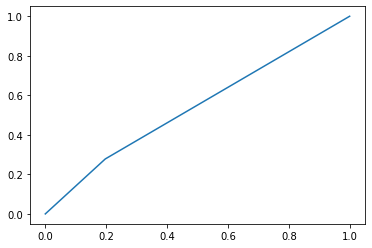

In [10]:
import models as md

md.KNN(X_train, X_test, y_train, y_test, n_neighbors_=1, leaf_size_=1)

In [12]:
OptimiseKNN(X_train, X_test, y_train, y_test)

TypeError: __call__() missing 3 required positional arguments: 'estimator', 'X', and 'y_true'

In [13]:
probs = knn.predict(X_test_scaled)

NameError: name 'knn' is not defined

In [ ]:
roc_auc_score(y_test, probs)

In [ ]:
print_metrics(y_test, probs)

In [ ]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
plt.plot(false_positive_rate,true_positive_rate)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Grid Search

In [ ]:
test_tree = KNeighborsClassifier()

param_grid = {'n_neighbors':[10,11,12,13,14,15,16,17,18],
              'leaf_size' : [5,10,15,20,25,30,35]   
                }

gs_knc = GridSearchCV(test_tree, param_grid, cv=5, scoring=scorer)
gs_knc.fit(X_train, y_train)

In [ ]:
gs_knc.best_params_

In [ ]:
gs_knc.best_index_

In [ ]:
cvs = pd.DataFrame(gs_knc.cv_results_)
cvs.head()

In [ ]:
best_model = KNeighborsClassifier(leaf_size = 5, n_neighbors = 11)
best_model.fit(X_train_scaled, y_train)
best_probs = best_model.predict(X_test_scaled)

In [ ]:
print_metrics(y_test, best_probs)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
plt.plot(false_positive_rate,true_positive_rate)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc